In [1]:
import random
import hashlib
import urllib
import requests
import json                                               #安装相应的库
def tran(word):
    src = 'en'                                                #翻译的源语言
    obj = 'zh'                                                #翻译的目标语言
    appid = '20200126000377982'                                     #这里输入你注册后得到的appid
    secretKey = 'TTAuPY1_XLhd6iIcGUCN'                                  #这里输入你注册后得到的密匙       

    myurl = 'http://api.fanyi.baidu.com/api/trans/vip/translate'                  #必须加上的头
#     word= 'Factor for converting coal consumed by the transportation sector from physical units to Btu.'                                          #输入你要翻译的中文
    salt = random.randint(31256, 66253)                                           #产生随计数

    sign = appid + word + str(salt) + secretKey                                   #文档的step1拼接字符串
    m1 = hashlib.md5()
    m1.update(sign.encode('utf-8'))
    sign = m1.hexdigest()                                                         #文档的step2计算签名
    myur1 = myurl  + '?q=' + urllib.parse.quote(
        word) + '&from=' + src + '&to=' + obj + '&appid='+ appid + '&salt=' + str(salt) + '&sign=' + sign
                                                                   #生成的url并打印出来
    english_data = requests.get(myur1)                                            #请求url
    js_data = json.loads(english_data.text)                                       #下载json数据
    content = js_data['trans_result'][0]['dst']                                   #提取json数据里面的dst
    return content

In [25]:
data['Chinese']=data['Description'].map(lambda x: tran(x))
data.head()

,MSN,Description,Chinese
0,ABICB,Aviation gasoline blending components consumed...,工业部门消耗的航空汽油混合成分。
1,ABICP,Aviation gasoline blending components consumed...,工业部门消耗的航空汽油混合成分。
2,ARICB,Asphalt and road oil consumed by the industria...,工业部门消耗的沥青和道路油。
3,ARICD,Asphalt and road oil price in the industrial s...,工业部门的沥青和道路石油价格。
4,ARICP,Asphalt and road oil consumed by the industria...,工业部门消耗的沥青和道路油。


In [27]:
data.to_csv('a.csv')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series
energy=pd.read_csv("ProblemCData.csv")
data=pd.read_csv("a.csv")
energy.head()

,MSN,StateCode,Year,Data
0,ABICB,AZ,1960,0.0
1,ABICB,AZ,1961,0.0
2,ABICB,AZ,1962,0.0
3,ABICB,AZ,1963,0.0
4,ABICB,AZ,1964,0.0


In [2]:
data2=pd.merge(energy,data,on='MSN')
data2=data2[['MSN','StateCode','Year','Data','Chinese']]
data2

,MSN,StateCode,Year,Data,Chinese
0,ABICB,AZ,1960,0.00000,工业部门消耗的航空汽油混合成分。
1,ABICB,AZ,1961,0.00000,工业部门消耗的航空汽油混合成分。
2,ABICB,AZ,1962,0.00000,工业部门消耗的航空汽油混合成分。
3,ABICB,AZ,1963,0.00000,工业部门消耗的航空汽油混合成分。
4,ABICB,AZ,1964,0.00000,工业部门消耗的航空汽油混合成分。
...,...,...,...,...,...
105419,WYTCB,TX,2005,42367.85279,风能发电。
105420,WYTCB,TX,2006,66164.83829,风能发电。
105421,WYTCB,TX,2007,89019.08957,风能发电。
105422,WYTCB,TX,2008,159881.36380,风能发电。


In [39]:
pd.set_option('display.float_format',lambda x : '%.5f' % x)
data_total=data2.loc[data2['MSN'].str.contains('TCB')]
data_total_AZ_1999=data_total.loc[(data_total.StateCode == 'AZ') & (data_total.Year == 1999)]
data_total_AZ_1999

,MSN,StateCode,Year,Data,Chinese
1159,ARTCB,AZ,1999,25311.89647,沥青和道路油总消耗量。
3319,AVTCB,AZ,1999,792.43504,航空汽油总消耗量。
4759,BMTCB,AZ,1999,12719.41704,生物质总消耗量
11919,CLTCB,AZ,1999,403262.10760,煤炭总消耗量。
17799,DFTCB,AZ,1999,117482.02260,馏分燃料油总消耗量。
23479,EMTCB,AZ,1999,1269.32044,燃料乙醇，不含变性剂，总消耗量。
28039,ESTCB,AZ,1999,196742.55980,总耗电量（即销售）。
29479,FFTCB,AZ,1999,1074262.38200,化石燃料，总消耗量。
33131,GETCB,AZ,1999,286.20000,地热能总消耗量。
35051,HYTCB,AZ,1999,99793.66264,水力发电总产量。


In [49]:
unres=['CLTCB','PATCB','NGTCB','FFTCB']
res=['GETCB','HYTCB','WYTCB','RETCB']
data_unres=data2.loc[data2.MSN.isin(unres)]
data_unres.shape[0]

800

In [68]:
data_res=data2.loc[data2.MSN.isin(res)]
data_res

,MSN,StateCode,Year,Data,Chinese
33092,GETCB,AZ,1960,0.00000,地热能总消耗量。
33093,GETCB,AZ,1961,0.00000,地热能总消耗量。
33094,GETCB,AZ,1962,0.00000,地热能总消耗量。
33095,GETCB,AZ,1963,0.00000,地热能总消耗量。
33096,GETCB,AZ,1964,0.00000,地热能总消耗量。
33097,GETCB,AZ,1965,0.00000,地热能总消耗量。
33098,GETCB,AZ,1966,0.00000,地热能总消耗量。
33099,GETCB,AZ,1967,0.00000,地热能总消耗量。
33100,GETCB,AZ,1968,0.00000,地热能总消耗量。
33101,GETCB,AZ,1969,0.00000,地热能总消耗量。


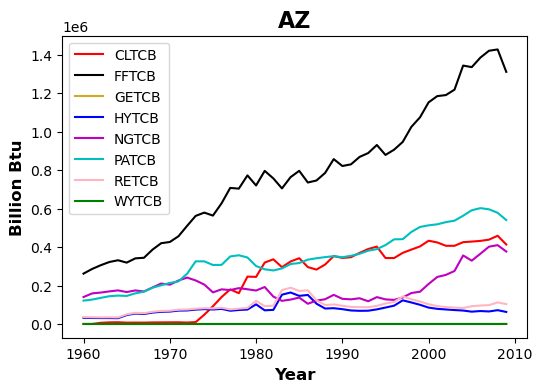

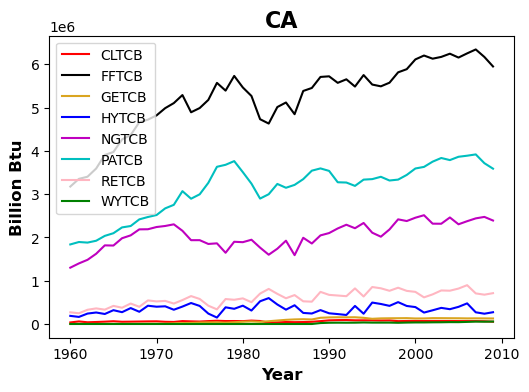

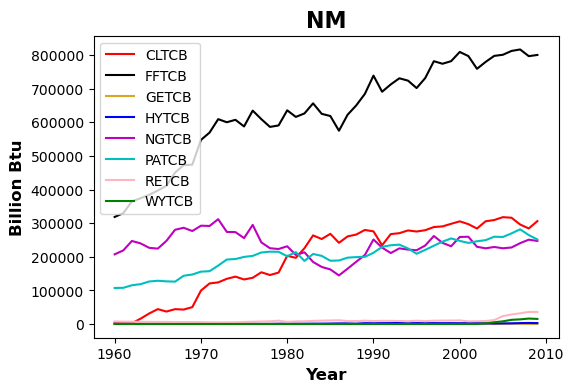

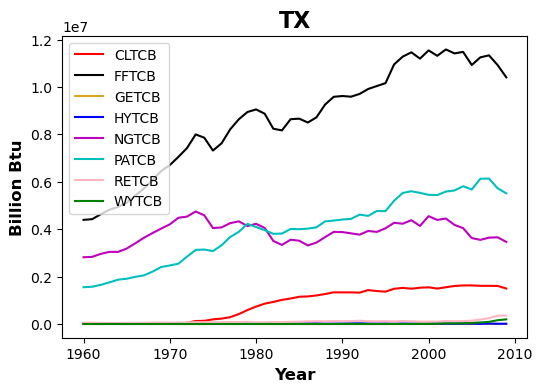

In [81]:
data_res2=data2.loc[data2.MSN.isin(res+unres)]
# from itertools import cycle
# cycol = cycle('bgrcmk')  #随机颜色
cycol={'CLTCB':'r','PATCB':'c','NGTCB':'m','FFTCB':'k','GETCB':'#DAA520','HYTCB':'b','WYTCB':'g','RETCB':'#FFB6C1'}
grouped=data_res2.groupby('StateCode')  #以StateCode分组，画4张图
for name,group in grouped:
    grouped2=group.groupby('MSN')    #以MSN分组
    fig, ax = plt.subplots()    #为了画在一张图内
    for name2,group2 in grouped2:
        group2.plot(ax=ax, kind = 'line', x='Year',y='Data',c=cycol.get(name2),label=name2)
        plt.title(name,fontsize=16,fontweight='bold')
        plt.ylabel('Billion Btu',fontsize=12,fontweight='bold')
        plt.xlabel('Year',fontsize=12,fontweight='bold')
        plt.rcParams['savefig.dpi'] = 100 #图片像素
        plt.rcParams['figure.dpi'] = 100 #分辨率
plt.show()

In [33]:
# data2.plot(x='Year',y=data2.loc[data2.MSN=='RETCB']/data2.loc[data2.MSN=='TETCB'])
RETCB=data2.loc[data2.MSN=='RETCB']
TETCB=data2.loc[data2.MSN=='TETCB']
RETCB.rename(columns={'Data':'Data_RETCB'})
RETCB.columns = ['MSN', 'StateCode', 'Year', 'Data_RETCB','Chinese']
TETCB.columns = ['MSN', 'StateCode', 'Year', 'Data_TETCB','Chinese']
TETCB['num']=list(range(1, 201))
TETCB = TETCB.set_index('num',drop=True, append=False, inplace=False, verify_integrity=False)
RETCB['num']=list(range(1, 201))
RETCB = RETCB.set_index('num',drop=True, append=False, inplace=False, verify_integrity=False)
TETCB

<ipython-input-33-8f6d5eb90296>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TETCB['num']=list(range(1, 201))
<ipython-input-33-8f6d5eb90296>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RETCB['num']=list(range(1, 201))


,MSN,StateCode,Year,Data_TETCB,Chinese
num,,,,,
1,TETCB,AZ,1960,2.831287e+05,总能耗。
2,TETCB,AZ,1961,3.049701e+05,总能耗。
3,TETCB,AZ,1962,3.250852e+05,总能耗。
4,TETCB,AZ,1963,3.484806e+05,总能耗。
5,TETCB,AZ,1964,3.698446e+05,总能耗。
...,...,...,...,...,...
196,TETCB,TX,2005,1.154426e+07,总能耗。
197,TETCB,TX,2006,1.198811e+07,总能耗。
198,TETCB,TX,2007,1.206817e+07,总能耗。


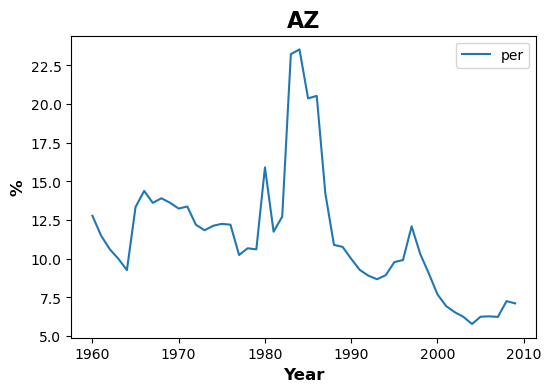

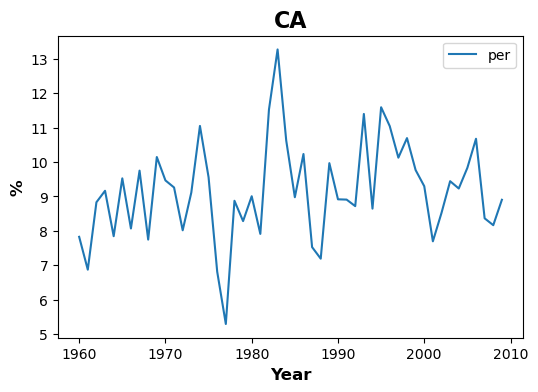

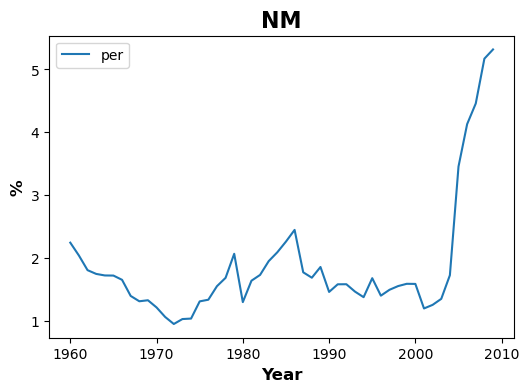

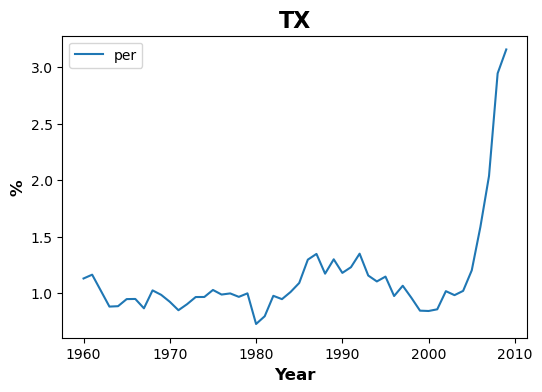

In [38]:
TETCB['per']=RETCB['Data_RETCB']/TETCB['Data_TETCB']*100
grouped3=TETCB.groupby('StateCode')
for name3,group3 in grouped3:
    group3.plot(kind = 'line', x='Year',y='per')
    plt.title(name3,fontsize=16,fontweight='bold')
    plt.ylabel('%',fontsize=12,fontweight='bold')
    plt.xlabel('Year',fontsize=12,fontweight='bold')
    plt.rcParams['savefig.dpi'] = 100 #图片像素
    plt.rcParams['figure.dpi'] = 100 #分辨率
plt.show()

In [3]:
result=pd.DataFrame(columns=['name','number'])
result

,name,number


In [9]:
# result.append({'asd':5},ignore_index=True)
result.loc[0]=['cat', 3]
result

,name,number
0,cat,3


In [12]:
a='2018-1-1'
if a>'2019':
    print('ok')
else:
    print('no')

no
